<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-17
# DS-Unit-1-Sprint-4-Linear-Algebra/
# module1-linear-algebra-review/

Lecture Notebook  
[https://colab.research.google.com/drive/1SsdUUav7bJTC6bF5D8_mEd46mao6isk_](https://colab.research.google.com/drive/1SsdUUav7bJTC6bF5D8_mEd46mao6isk_)   

In [0]:
import numpy as np
import pandas as pd
import random

from math import pi, e

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

### First of all, figure out some numpy array features

In [247]:
# some numpy array features
v1 = np.array([1,2,3])
v2 = np.array([[1,2,3]])
v3 = np.array([[1], [2], [3]])
print(v1)
print(v2)
print(v3)

[1 2 3]
[[1 2 3]]
[[1]
 [2]
 [3]]


In [248]:
print(v1.reshape(1,-1))
print(v2.reshape(1,-1))
print(v3.reshape(1,-1))

[[1 2 3]]
[[1 2 3]]
[[1 2 3]]


In [249]:
print(v1.reshape(-1,1))
print(v2.reshape(-1,1))
print(v3.reshape(-1,1))

[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]


In [250]:
print(v1.T)
print(v2.T)
print(v3.T)

[1 2 3]
[[1]
 [2]
 [3]]
[[1 2 3]]


In [252]:
print(v1.shape, v2.shape, v3.shape)

(3,) (1, 3) (3, 1)


# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

In [0]:
def ndim_vector(dim=2):
  v=[]
  for _ in range(dim):
    v.append(random.uniform(0, 1))
  return np.array(v)

def ndim_vectors(dim=2, n=1):
  vs = []
  for _ in range(n):
    vs.append(ndim_vector(dim=dim))
  return np.array(vs)

In [216]:
v1 = ndim_vector(dim=2)
print(v1)
type(v1)

[0.60169996 0.52713773]


numpy.ndarray

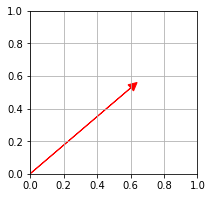

In [217]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid(True)

plt.arrow(0,0, v1[0],v1[1], 
          head_width=.05, head_length=0.05, color ='red');

## 1.2 Create a three-dimensional vecor and plot it on a graph

In [218]:
v2 = ndim_vector(dim=3)
print(v2)

[0.03589783 0.50229342 0.5676774 ]


https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot  

In [0]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]), (xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

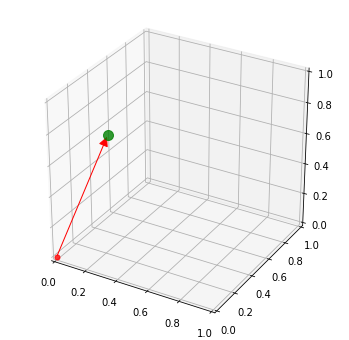

In [220]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)

ax.plot(xs=[0], ys=[0], zs=[0], 
        marker='o', markersize=5, color='red', alpha=0.8)
ax.plot(xs=[v2[0]], ys=[v2[1]], zs=[v2[2]], 
        marker='o', markersize=10, color='green', alpha=0.8
       )
a = Arrow3D([0, v2[0]], [0, v2[1]], [0, v2[2]], 
            mutation_scale=20, 
            lw=1, arrowstyle="-|>", color="r")
ax.add_artist(a);
plt.draw()
plt.show()

In [221]:
vs = ndim_vectors(dim=3, n=5)
print(vs)

[[0.400487   0.62468798 0.84575735]
 [0.93459371 0.264632   0.46514523]
 [0.24640899 0.15463478 0.94343126]
 [0.08125366 0.58617765 0.72981898]
 [0.82078659 0.85849001 0.24769703]]


In [222]:
vs_T = np.array(vs).T
print(vs_T)

[[0.400487   0.93459371 0.24640899 0.08125366 0.82078659]
 [0.62468798 0.264632   0.15463478 0.58617765 0.85849001]
 [0.84575735 0.46514523 0.94343126 0.72981898 0.24769703]]


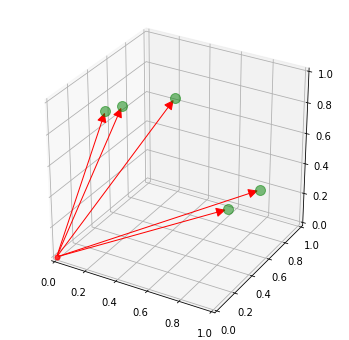

In [223]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)

ax.plot(xs=[0], ys=[0], zs=[0], 
        marker='o', markersize=5, color='red', alpha=0.8)
ax.plot(xs=vs_T[0], ys=vs_T[1], zs=vs_T[2], 
        marker='o', markersize=10, color='green', alpha=0.5,
        linewidth=0)
for v in vs:
  a = Arrow3D([0, v[0]], [0, v[1]], [0, v[2]], 
              mutation_scale=20, 
              lw=1, arrowstyle="-|>", color="red")
  ax.add_artist(a)
plt.draw()
plt.show();

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

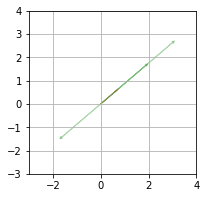

In [227]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_xlim(-3,4)
ax.set_ylim(-3,4)
ax.grid(True)

plt.arrow(0,0, v1[0],v1[1], 
          head_width=.05, head_length=0.2, color ='red', alpha=0.3);

for factor in [5, pi, -e]:
  plt.arrow(0,0, v1[0]*factor,v1[1]*factor, 
            head_width=.1, head_length=0.1, color ='green', alpha=0.3);
  
# could fix the colors here

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

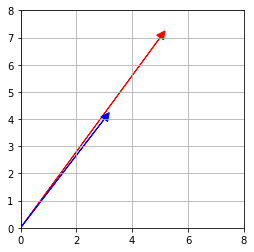

In [136]:
va = np.array([5, 7])
vb = np.array([3, 4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlim(0,8)
ax.set_ylim(0,8)
ax.grid(True)

plt.arrow(0,0, va[0],va[1], 
          head_width=.3, head_length=0.3, color ='red');
plt.arrow(0,0, vb[0],vb[1], 
          head_width=.3, head_length=0.3, color ='blue');

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

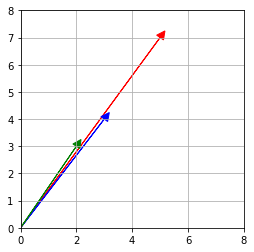

In [137]:
v_minus = va - vb
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlim(0,8)
ax.set_ylim(0,8)
ax.grid(True)

plt.arrow(0,0, va[0],va[1], 
          head_width=.3, head_length=0.3, color ='red');
plt.arrow(0,0, vb[0],vb[1], 
          head_width=.3, head_length=0.3, color ='blue');
plt.arrow(0,0, v_minus[0],v_minus[1], 
          head_width=.3, head_length=0.3, color ='green');

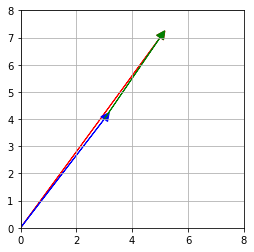

In [138]:
v_minus = va - vb
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlim(0,8)
ax.set_ylim(0,8)
ax.grid(True)

plt.arrow(0,0, va[0],va[1], 
          head_width=.3, head_length=0.3, color ='red');
plt.arrow(0,0, vb[0],vb[1], 
          head_width=.3, head_length=0.3, color ='blue');
plt.arrow(vb[0],vb[1], v_minus[0],v_minus[1], 
          head_width=.3, head_length=0.3, color ='green');

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [127]:
# dot product
vc = np.array([7,22,4,16])
vd = np.array([12,6,2,9])
v_dot= np.dot(vc, vd)
v_dot

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [128]:
# cross product
ve = np.array([5,7,2])
vf = np.array([3,4,6])
v_cross = np.cross(ve, vf)
v_cross

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

<img src="http://www.learningaboutelectronics.com/images/Magnitude-formulas.png" width="250">

In [132]:
# norm or magnitude (length of the vector)
ve = np.array([1,1,1,8])
vf = np.array([3,3,3,3])
print(np.linalg.norm(ve))
print(np.linalg.norm(vf))

8.18535277187245
6.0


## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

https://en.wikipedia.org/wiki/Orthogonality  
In Euclidean space, two vectors are orthogonal if and only if their dot product is zero, i.e. they make an angle of 90° (π/2 radians), or one of the vectors is zero. Hence orthogonality of vectors is an extension of the concept of perpendicular vectors to spaces of any dimension.  



In [141]:
# two vectors are orthogonal
vg = np.array([1, 0, -1])
vh = np.array([1, 2**.5, 1])
np.dot(vg, vh)

0.0

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [144]:
va = np.array([[1,2], [3,4], [5,6]])
vb = np.array([2,4,6]) # or np.array([[2,4,6]])
vc = np.array([[9,6,3], [4,7,11]])
vd = np.array([[1,0,0], [0,1,0], [0,0,1]])
ve = np.array([[1,3], [5,7]])
vs = [va, vb, vc, vd, ve]
print([v.shape for v in vs])

[(3, 2), (3,), (2, 3), (3, 3), (2, 2)]


In [158]:
np.matmul(va, ve)

array([[11, 17],
       [23, 37],
       [35, 57]])

In [151]:
# handle the exception
vb.shape[1]

IndexError: ignored

In [152]:
len(vb.shape)

1

In [153]:
# mask attribute 'shape'
def arr_shape(arr):
  s = arr.shape
  if len(s) == 1:
    shape = (1, arr.shape[0])
  else:
    shape = arr.shape
  return shape

arr_shape(vb)

(1, 3)

In [209]:
arr_shape(va)

(3, 2)

In [210]:
# CAUTION: in this case vb is treated as
#          as a column vector
np.matmul(vd, vb)

array([2, 4, 6])

In [208]:
for i, v1 in enumerate(vs):
  for v2 in vs[i+1:]:
    if arr_shape(v1)[1] == arr_shape(v2)[0]:
      print(np.matmul(v1, v2), '\n')
    if arr_shape(v2)[1] == arr_shape(v1)[0]:
      print(np.matmul(v2, v1), '\n')

[44 56] 

[[17 20 25]
 [43 46 53]
 [69 72 81]] 

[[ 42  60]
 [ 80 102]] 

[[1 2]
 [3 4]
 [5 6]] 

[[11 17]
 [23 37]
 [35 57]] 

[2 4 6] 

[[ 9  6  3]
 [ 4  7 11]] 

[[21 27 36]
 [73 79 92]] 



## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

<img src="https://cdn.kastatic.org/googleusercontent/qCWpcd2cPFXad5omuF_ulaYlaBomeBw5RS_9GYLUJg9lZd25SIuvConuu_CfoGBzZJjZGr05602QTJyR0JImBeG39A" width="300">

In [162]:
print(np.matmul(vc, vd))

[[ 9  6  3]
 [ 4  7 11]]


In [163]:
print(np.matmul(va, ve))

[[11 17]
 [23 37]
 [35 57]]


In [165]:
print(np.matmul(vb, va))

[44 56]


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [168]:
mf = np.array([[20, 19, 18, 17],
               [16, 15, 14, 13],
               [12, 11, 10, 9],
               [8, 7, 6, 5],
               [4, 3, 2, 1]
     ])
mf_T = mf.T
mf_T

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

In [169]:
print(mf.shape, mf_T.shape)

(5, 4) (4, 5)


# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [175]:
mg = np.array([[12, 11], [7, 10]])
mi2 = np.identity(2, dtype=int)
mi2

array([[1, 0],
       [0, 1]])

In [176]:
# matrix IG
np.matmul(mi2, mg)

array([[12, 11],
       [ 7, 10]])

In [178]:
# matrix GI
np.matmul(mg, mi2)

array([[12, 11],
       [ 7, 10]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


Ryan Allred [5:32 PM]  
Single vertical lines around an upper-case variable is for finding the determinant of a matrix. Double vertical lines around a lower-case variable is for finding the norm of a vector. (edited) 

In [0]:
mh = np.array([[12, 11], [7, 10]])
mj = np.array([[0, 1, 2],
               [7, 10, 4],
               [3, 2, 0]
              ])

In [182]:
# finding the determinant of a matrix
dh1 = 12 * 10 - 7 * 11
dh2 = np.linalg.det(mh)
print(dh1, dh2)

43 43.000000000000014


In [184]:
# alright I will write the recursive function later
dj2 = np.linalg.det(mj)
print(dj2)

-19.999999999999996


## 3.3 Find H^{-1} and then find J^{-1}

In [187]:
# inverse of a matrix
mh_inv = np.linalg.inv(mh)
mh_inv

array([[ 0.23255814, -0.25581395],
       [-0.1627907 ,  0.27906977]])

In [188]:
# inverse of a matrix
mj_inv = np.linalg.inv(mj)
mj_inv

array([[ 0.4 , -0.2 ,  0.8 ],
       [-0.6 ,  0.3 , -0.7 ],
       [ 0.8 , -0.15,  0.35]])

In [0]:
# I will probably write my own inverse function later

## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [198]:
np.matmul(mh, mh_inv).round(6)

array([[1., 0.],
       [0., 1.]])

In [199]:
np.matmul(mh_inv, mh).round(6)

array([[1., 0.],
       [0., 1.]])

In [200]:
np.matmul(mj_inv, mj).round(6)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [-0., -0.,  1.]])

In [201]:
np.matmul(mj, mj_inv).round(6)

array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?



In [0]:
# Write a function that can calculate the dot product 
# of any two vectors of equal length that are passed to it.
def dot_prod(v1, v2):
  assert(len(v1)==len(v2))
  return sum([x*y for x,y in zip(v1,v2)])

In [228]:
v1 = [1, 2, 3]
v2 = [7, 8, 9]
print(dot_prod(v1, v2), np.dot(v1, v2))

50 50


In [207]:
v3 = [1, 2, 3]
v4 = [7, 8, 9, 10]
dot_prod(v3, v4)

AssertionError: ignored

In [236]:
# Write a function that can calculate the norm of any vector
def vector_norm(v):
  assert(len(v) != 0 )
  return sum(x**2 for x in v) ** 0.5

print(vector_norm(v1), np.linalg.norm(v1))

3.7416573867739413 3.7416573867739413


0.0


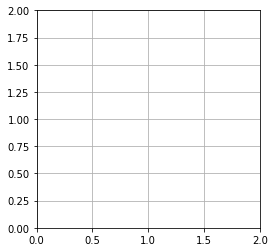

In [239]:
# Prove to yourself again that the vectors in 1.9 are orthogonal 
# by graphing them

# two vectors are orthogonal
vg = np.array([1, 0, -1])
vh = np.array([1, 2**.5, 1])
print(np.dot(vg, vh))

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.grid(True)


In [0]:
# Create and plot a matrix on a 2d graph.
# Create and plot a matrix on a 3d graph.

# kinda did it in previous code blocks
# skip this two assignments

<img src="http://drive.google.com/uc?export=view&id=1AdiPPgawqY3ZPrNdr41_YSvM_OGjmiUk" width="600">  

<img src="https://davidroodman.com/wp-content/uploads/2016/02/determinant-as-area-1.png" width="500">  

**【行列式】** https://zh.wikipedia.org/wiki/%E8%A1%8C%E5%88%97%E5%BC%8F  

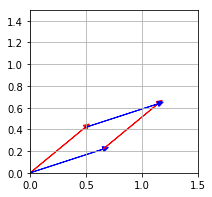

In [256]:
# Plot two vectors that are not collinear on a 2d graph. 
# Calculate the determinant of the 2x2 matrix that these 
# vectors form. How does this determinant relate to the 
# graphical interpretation of the vectors?

# how am i supposed to illustrate this?!

v1 = ndim_vector(dim=2)
v2 = ndim_vector(dim=2)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.grid(True)

plt.arrow(0,0, v1[0],v1[1], 
          head_width=.05, head_length=0.05, color ='red');
plt.arrow(0,0, v2[0],v2[1], 
          head_width=.05, head_length=0.05, color ='blue');
plt.arrow(v2[0],v2[1], v1[0],v1[1], 
          head_width=.05, head_length=0.05, color ='red');
plt.arrow(v1[0],v1[1], v2[0],v2[1], 
          head_width=.05, head_length=0.05, color ='blue');